数据来源：sklearn提供的文本语料

In [1]:
#加载数据
from time import time
from sklearn.datasets import load_files

print("loading documents ...")
t=time()
docs=load_files('data2')
print("summary: {0} documents in {1} categories.". format(len(docs.data),len(docs.target_names)))
print("done in {0} seconds".format(time()-t))

loading documents ...
summary: 3949 documents in 4 categories.
done in 0.4295516014099121 seconds


In [2]:
#文档转化为TF-IDF特征
from sklearn.feature_extraction.text import TfidfVectorizer

max_features=20000
print("vectorizing documents ,,,")
t=time()
vectorizer=TfidfVectorizer(max_df=0.4,min_df=0.2,max_features=max_features,encoding='latin-1')
#max_df=0.4：忽略在超过40%文档中出现的词（即过于常见的词）。
#min_df=0.2：忽略在少于20%文档中出现的词（即过于稀有的词）。
#max_features=20000：保留出现频率最高的20000个词语。

#将文档转换为TF-IDF矩阵，并保存在 X 中。矩阵的行表示文档，列表示特征（即词汇），每个元素表示词汇的TF-IDF值。
X=vectorizer.fit_transform((d for d in docs.data))

print("n_sample: %d, n_features: %d" % X.shape)
print("number of non-zero features in sample [{0}]:{1}".format(docs.filenames[0],X[0].getnnz()))
print("done in {0} seconds".format(time()-t))

vectorizing documents ,,,
n_sample: 3949, n_features: 44
number of non-zero features in sample [data2\sci.electronics\53669]:17
done in 1.585524082183838 seconds


In [3]:
from sklearn.cluster import KMeans

print("clustering documents ...")
t=time()
n_clusters=3
kmean=KMeans(n_clusters=n_clusters, random_state=42)
kmean.fit(X)
print("kmean: k={}, cost={}".format(n_clusters,int(kmean.inertia_)))
print("done in {0} seconds".format(time()-t))



clustering documents ...
kmean: k=3, cost=2915
done in 0.20152807235717773 seconds


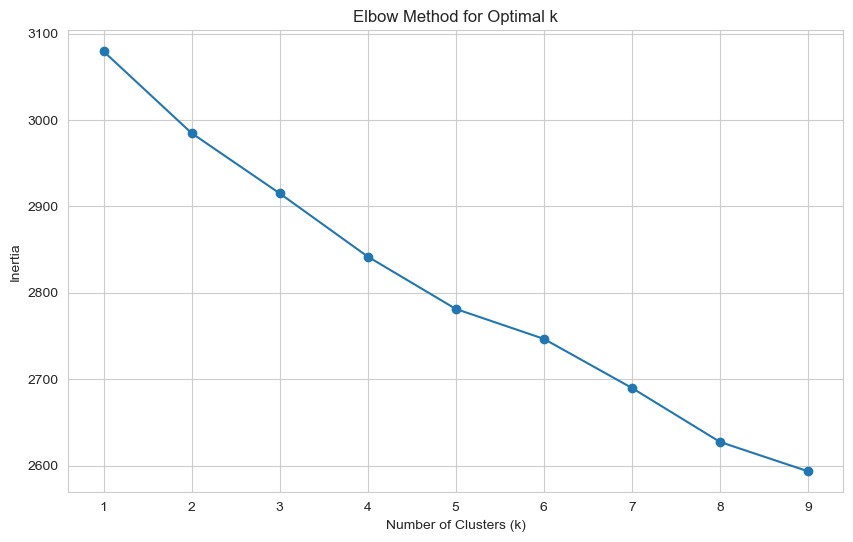

In [4]:
import matplotlib.pyplot as plt

# 使用肘部法则 (Elbow Method) 选择 k
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


clustering documents ...
kmean: k=3, cost=2915
done in 0.04982590675354004 seconds


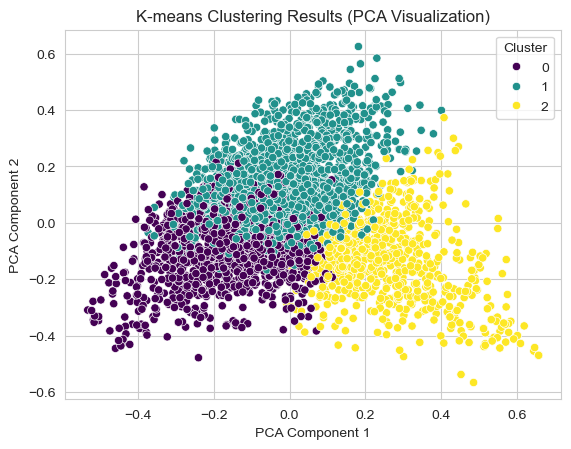

In [5]:
from sklearn.cluster import KMeans

print("clustering documents ...")
t=time()
n_clusters=3
kmean=KMeans(n_clusters=n_clusters, random_state=42)
kmean.fit(X)
print("kmean: k={}, cost={}".format(n_clusters,int(kmean.inertia_)))
print("done in {0} seconds".format(time()-t))

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# 降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 可视化
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmean.labels_, palette='viridis')
plt.title('K-means Clustering Results (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [6]:
from sklearn.metrics import silhouette_score
# 计算轮廓系数
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"轮廓系数: {silhouette_avg:.3f}")

轮廓系数: 0.048


In [7]:
import numpy as np
# 计算簇间平方和（BCSS）
def calculate_bcss(X, kmeans):
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    # 计算全局均值
    global_mean = np.mean(X.toarray(), axis=0)
    
    # 计算簇间平方和
    bcss = 0
    for i in range(kmeans.n_clusters):
        cluster_points = X[labels == i]
        cluster_mean = centers[i]
        cluster_size = cluster_points.shape[0]
        bcss += cluster_size * np.sum((cluster_mean - global_mean) ** 2)
    
    return bcss

bcss = calculate_bcss(X, kmeans)
print(f"簇间平方和 (BCSS): {bcss:.3f}")

簇间平方和 (BCSS): 486.051


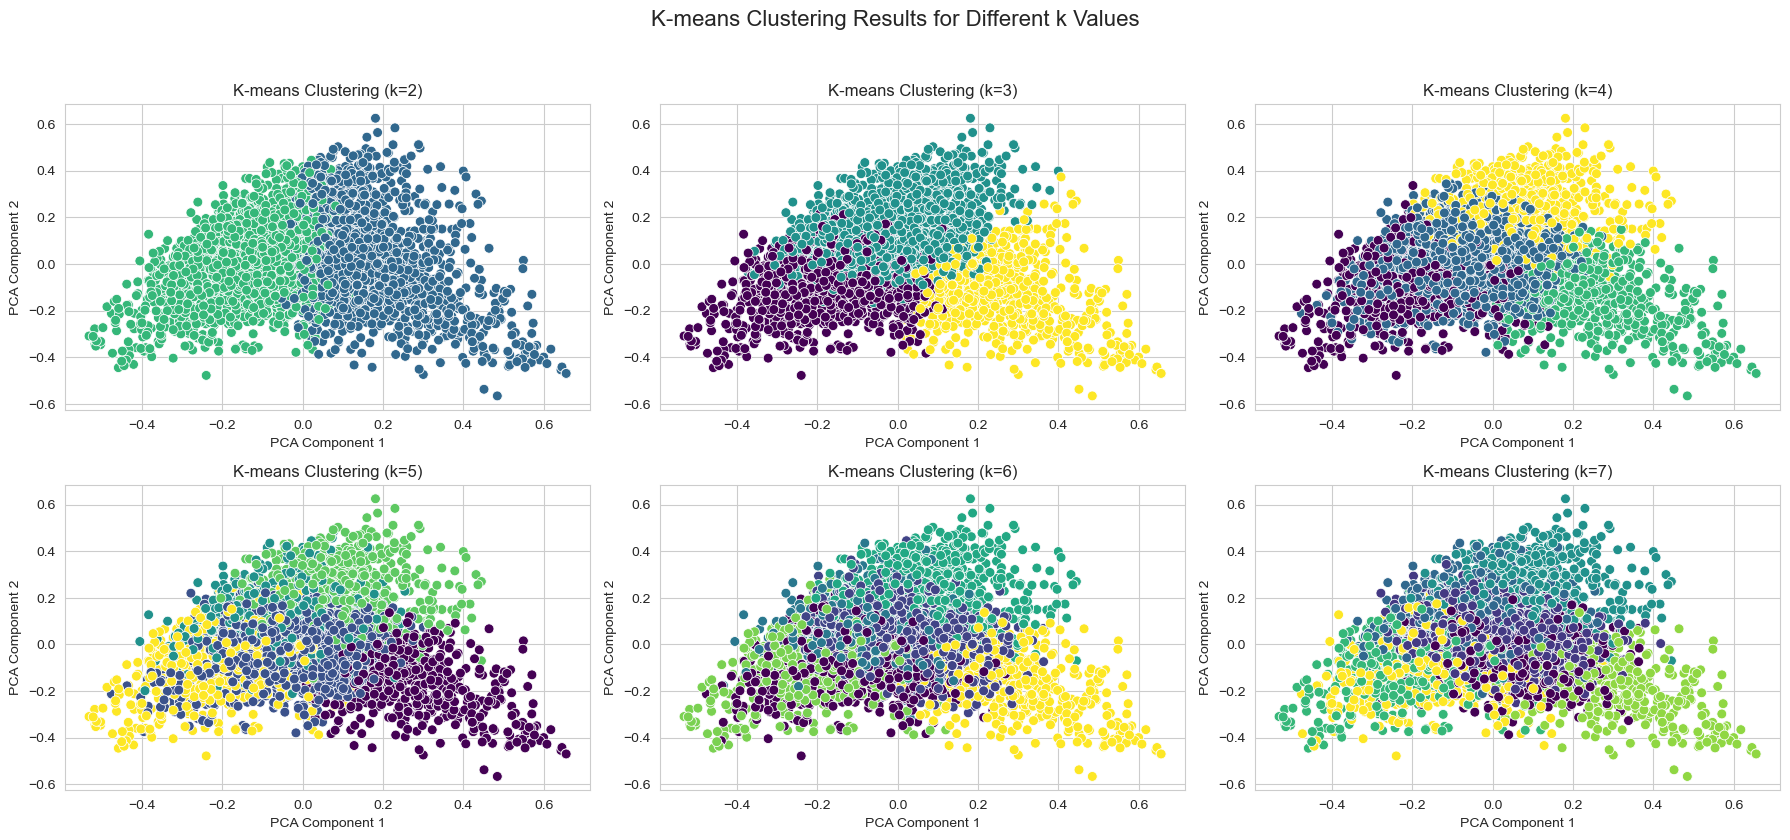

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# 设定 k 值的范围
k_values = range(2, 8)

# 创建大图和子图布局
plt.figure(figsize=(18, 12))

# 遍历每个 k 值，进行 K-means 聚类并绘制子图
for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X.toarray())  # 进行聚类并获取标签

    # 添加子图
    plt.subplot(3, 3, i)  # 创建 3x3 的子图布局
    sns.scatterplot(
        x=X_pca[:, 0], 
        y=X_pca[:, 1], 
        hue=cluster_labels, 
        palette='viridis', 
        s=50, 
        legend=None
    )
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)

# 显示整体大图
plt.suptitle('K-means Clustering Results for Different k Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
